## Benchmarks for batched red-black and AVL trees

In [25]:
# Prerequisites
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from importlib import reload
import utils
reload(utils)

build_results = utils.build_results_seq_opt
plot_results = utils.plot_results
plot_throughput_results = utils.plot_throughput_results

### AVL Tree explicitly batched performance for different methods of parallelising the batch

In [26]:
insert_eq_sub_batches = {"name": "avltree-explicitly-batched --insert-type=0", "label": "Equal sub-arrays of ops"}
insert_bin = {"name": "avltree-explicitly-batched --insert-type=1", "label": "Binary search in array of ops"}
insert_lin = {"name": "avltree-explicitly-batched --insert-type=2", "label": "Linear search in array of ops"}
insert_bin_lin = {"name": "avltree-explicitly-batched --insert-type=3", "label": "Binary and linear search in array of ops"}

avl_insert_methods_results = build_results([insert_eq_sub_batches, insert_bin, insert_lin, insert_bin_lin], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
})

plot_results('domains', [insert_eq_sub_batches, insert_bin, insert_lin, insert_bin_lin], avl_insert_methods_results, title="Performance of different insertion methods with explicit batching, time over domains")
plot_throughput_results('domains', [insert_eq_sub_batches, insert_bin, insert_lin, insert_bin_lin], avl_insert_methods_results, title="Performance of different insertion methods with explicit batching, throughput over domains")

  0%|          | 0/8 [00:00<?, ?it/s]

ValueError: Invalid operation {'name': 'avltree-explicitly-batched --insert-type=0', 'label': 'Equal sub-arrays of ops'}

<Figure size 1200x800 with 0 Axes>

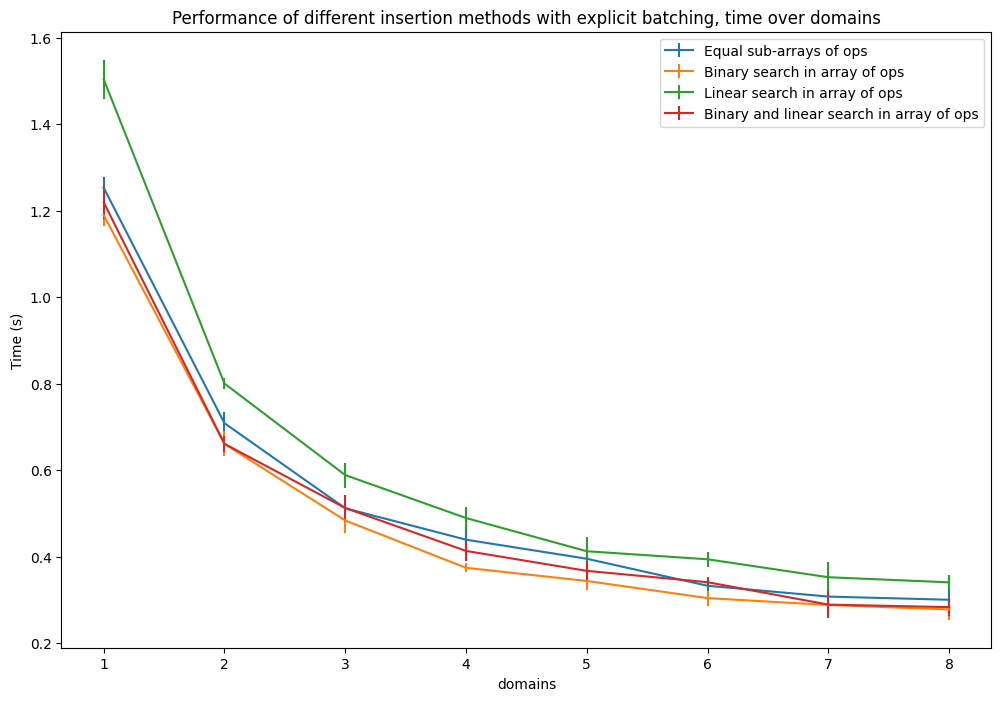

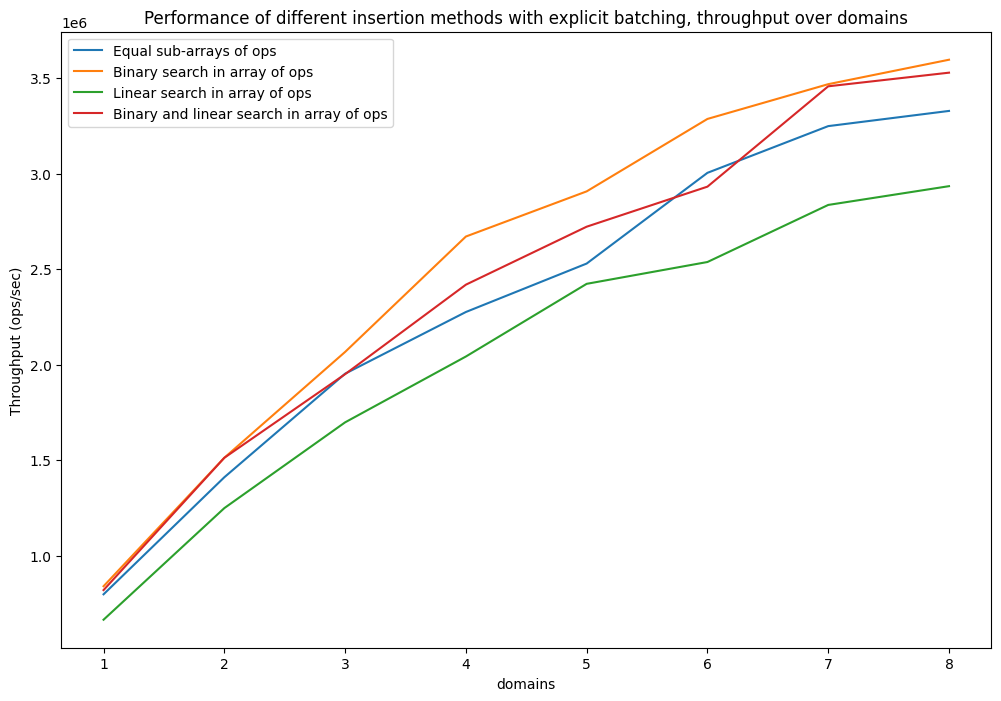

In [29]:
insert_eq_sub_batches["title"] = insert_eq_sub_batches["label"]
insert_bin["title"] = insert_bin["label"]
insert_lin["title"] = insert_lin["label"]
insert_bin_lin["title"] = insert_bin_lin["label"]
plot_results('domains', [insert_eq_sub_batches, insert_bin, insert_lin, insert_bin_lin], avl_insert_methods_results, title="Performance of different insertion methods with explicit batching, time over domains")
plot_throughput_results('domains', [insert_eq_sub_batches, insert_bin, insert_lin, insert_bin_lin], avl_insert_methods_results, title="Performance of different insertion methods with explicit batching, throughput over domains")

  0%|          | 0/8 [00:00<?, ?it/s]

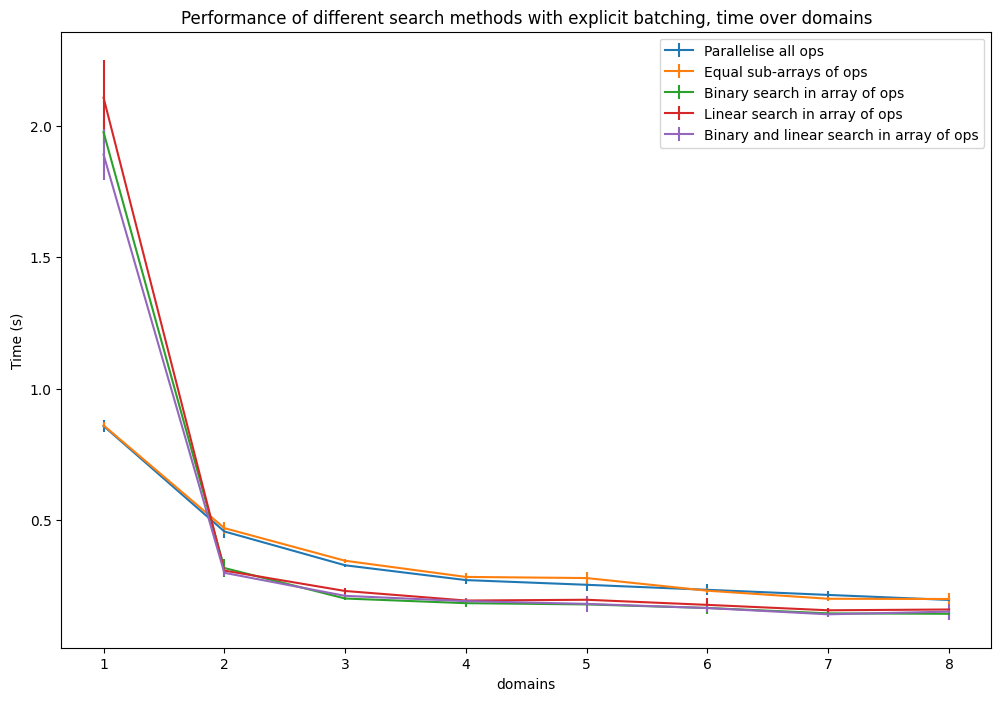

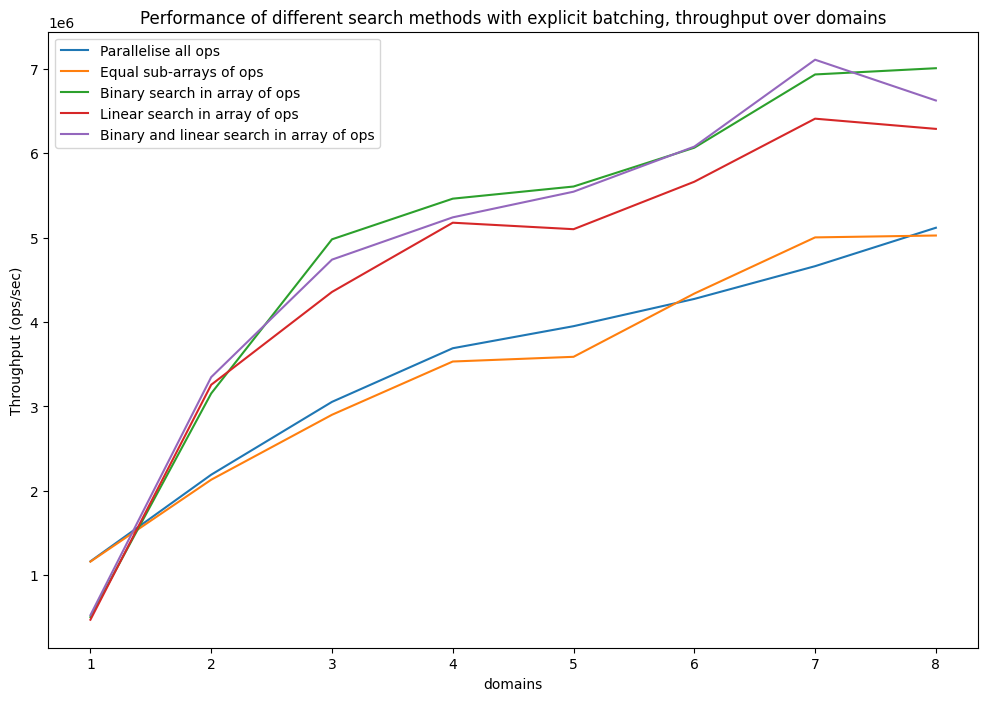

In [32]:
search_par_all = {"name": "avltree-explicitly-batched --search-type 0", "label": "Parallelise all ops", "title": "Parallelise all ops"}
search_eq_sub_batches = {"name": "avltree-explicitly-batched --search-type=1", "label": "Equal sub-arrays of ops", "title": "Equal sub-arrays of ops"}
search_bin = {"name": "avltree-explicitly-batched --search-type=2", "label": "Binary search in array of ops", "title": "Binary search in array of ops"}
search_lin = {"name": "avltree-explicitly-batched --search-type=3", "label": "Linear search in array of ops", "title": "Linear search in array of ops"}
search_bin_lin = {"name": "avltree-explicitly-batched --search-type=4", "label": "Binary and linear search in array of ops", "title": "Binary and linear search in array of ops"}

avl_search_methods_results = build_results([search_par_all, search_eq_sub_batches, search_bin, search_lin, search_bin_lin], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
})

plot_results('domains', [search_par_all, search_eq_sub_batches, search_bin, search_lin, search_bin_lin], avl_search_methods_results, title="Performance of different search methods with explicit batching, time over domains")
plot_throughput_results('domains', [search_par_all, search_eq_sub_batches, search_bin, search_lin, search_bin_lin], avl_search_methods_results, title="Performance of different search methods with explicit batching, throughput over domains")

# let avltree_insert_sequential_threshold = ref 128
# let avltree_insert_height_threshold = ref 7
# let avltree_search_sequential_threshold = ref 1
# let avltree_search_height_threshold = ref 0
# let avltree_binary_search_threshold = ref 200

  0%|          | 0/8 [00:00<?, ?it/s]

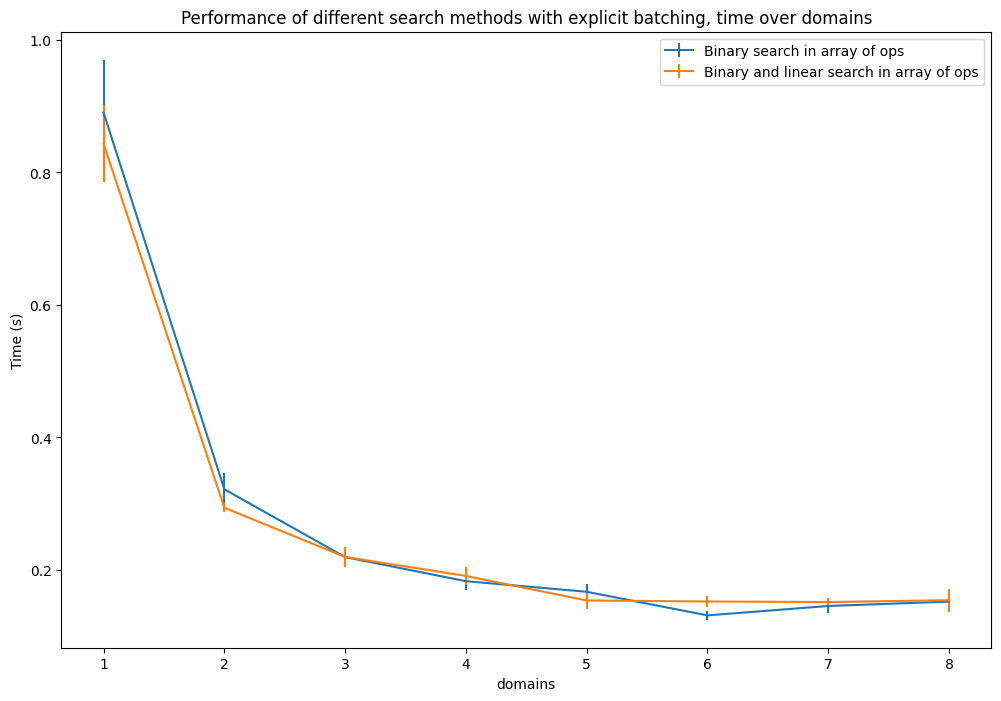

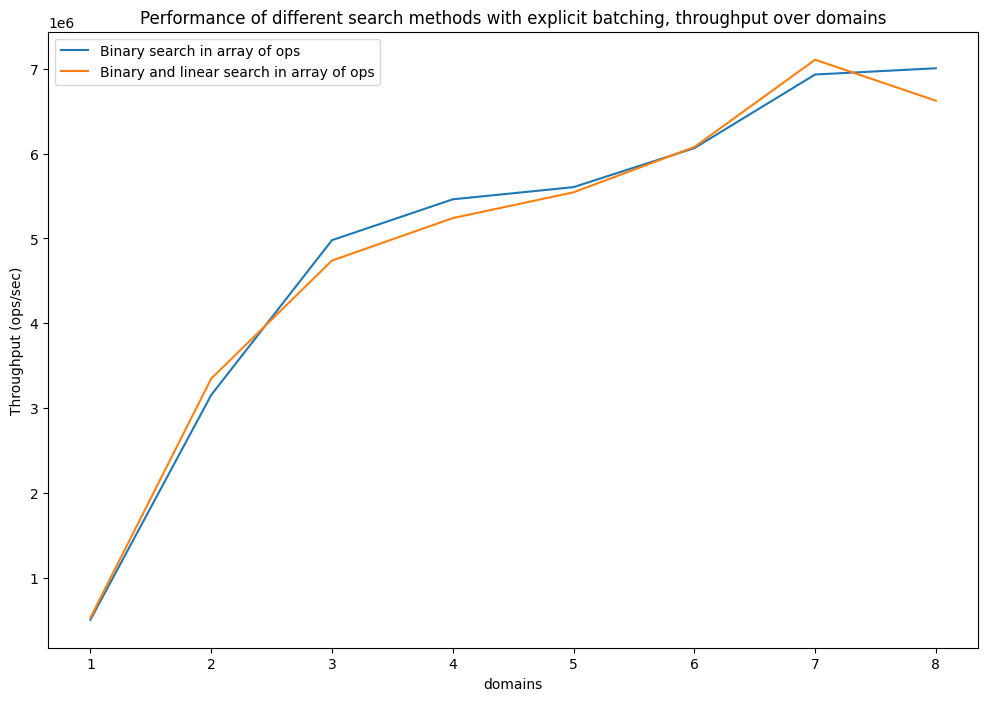

In [35]:
search_bin = {"name": "avltree-explicitly-batched --search-type=2", "label": "Binary search in array of ops", "title": "Binary search in array of ops"}
search_bin_lin = {"name": "avltree-explicitly-batched --search-type=4", "label": "Binary and linear search in array of ops", "title": "Binary and linear search in array of ops"}

avl_search_methods_results_2 = build_results([search_bin, search_bin_lin], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
})

plot_results('domains', [search_bin, search_bin_lin], avl_search_methods_results_2, title="Performance of different search methods with explicit batching, time over domains")
plot_throughput_results('domains', [search_bin, search_bin_lin], avl_search_methods_results, title="Performance of different search methods with explicit batching, throughput over domains")

## B-tree performance

  0%|          | 0/8 [00:00<?, ?it/s]

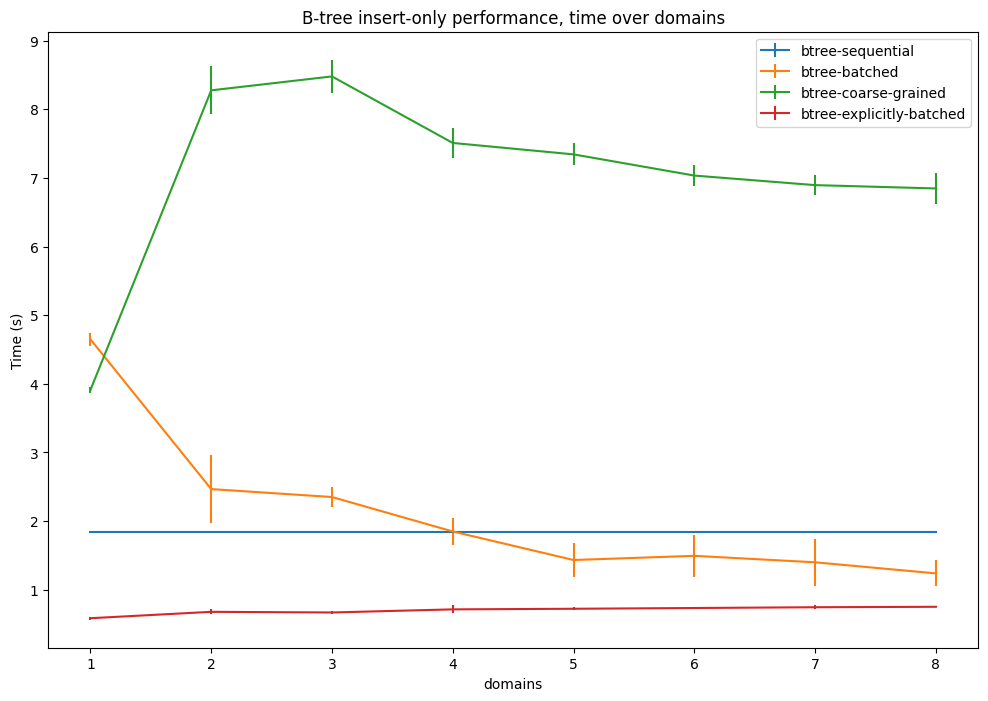

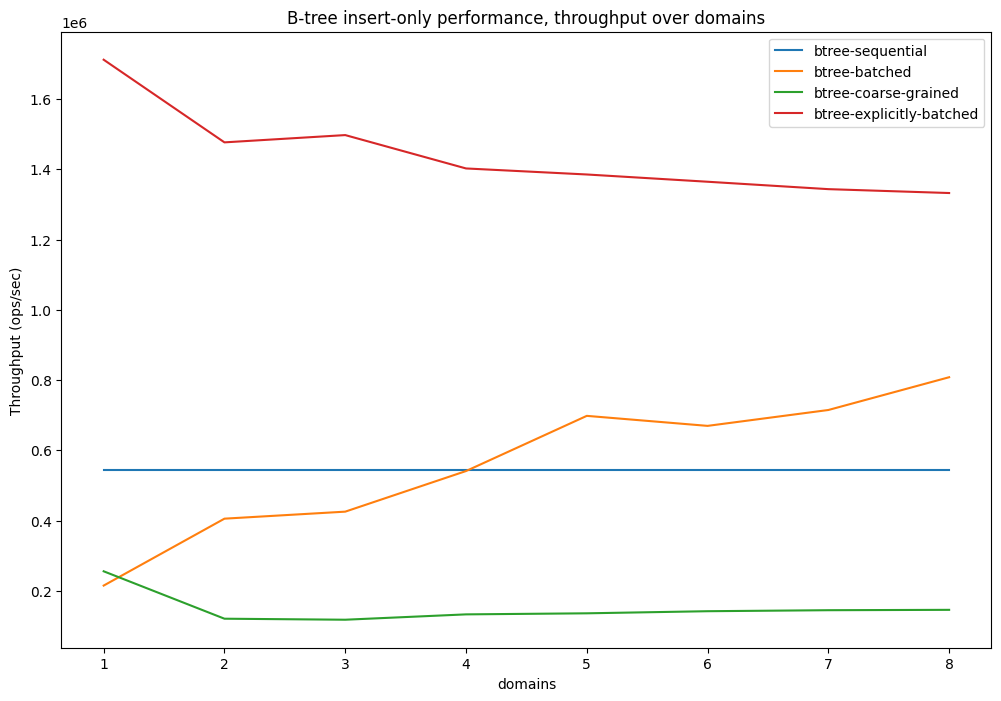

In [5]:
b_insert_only_results = build_results(["btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
    }, sequential="btree-sequential")

plot_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_insert_only_results, title="B-tree insert-only performance, time over domains")
plot_throughput_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_insert_only_results, title="B-tree insert-only performance, throughput over domains")

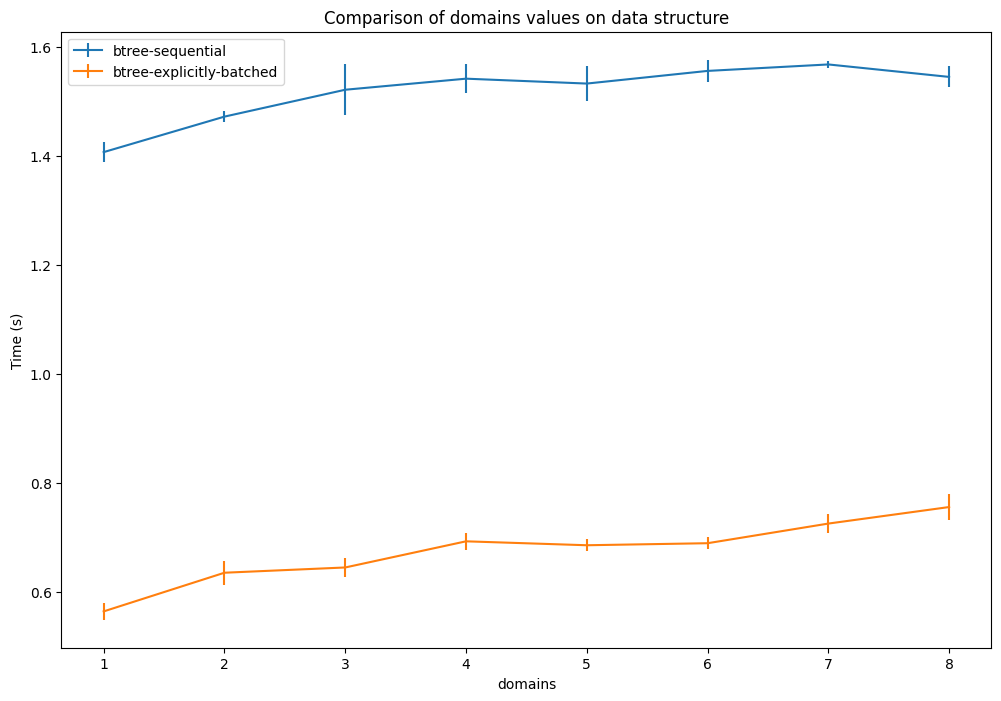

In [3]:
plot_results('domains', ["btree-sequential", "btree-explicitly-batched"], b_insert_only_results)

In [ ]:
b_search_only_results = build_results(["btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    }, sequential="btree-sequential")

plot_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_search_only_results, title="B-tree search-only performance, time over domains")
plot_throughput_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_search_only_results, title="B-tree search-only performance, throughput over domains")

In [ ]:
b_90_10_results = build_results(["btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], {
    'count': 500_000,
    'init_count': 2_000_000,
    'no_searches': 500_000,
    'no_iters':5
    }, sequential="btree-sequential")

plot_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_90_10_results, title="B-tree 90/10 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_90_10_results, title="B-tree 90/10 inserts/searches performance, throughput over domains")

In [ ]:
b_50_50_results = build_results(["btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], {
    'count': 500_000,
    'init_count': 2_000_000,
    'no_searches': 500_000,
    'no_iters':5
    }, sequential="btree-sequential")

plot_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_50_50_results, title="B-tree 50/50 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["btree-sequential","btree-batched", "btree-coarse-grained", "btree-explicitly-batched"], b_50_50_results, title="B-tree 50/50 inserts/searches performance, throughput over domains")

### AVL Tree performance

  0%|          | 0/8 [00:00<?, ?it/s]

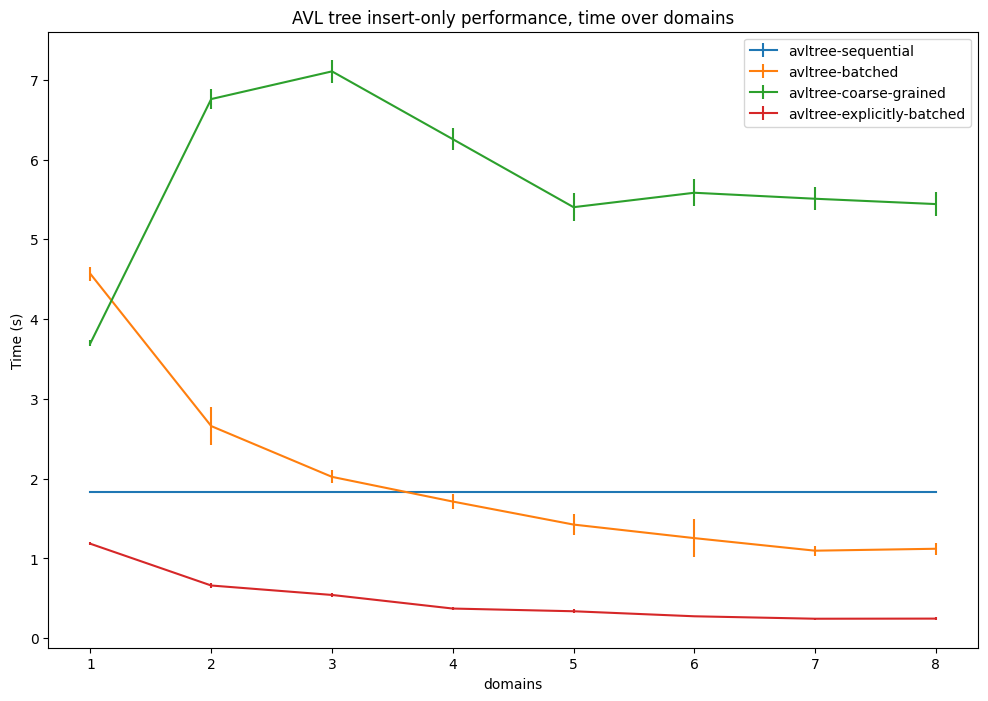

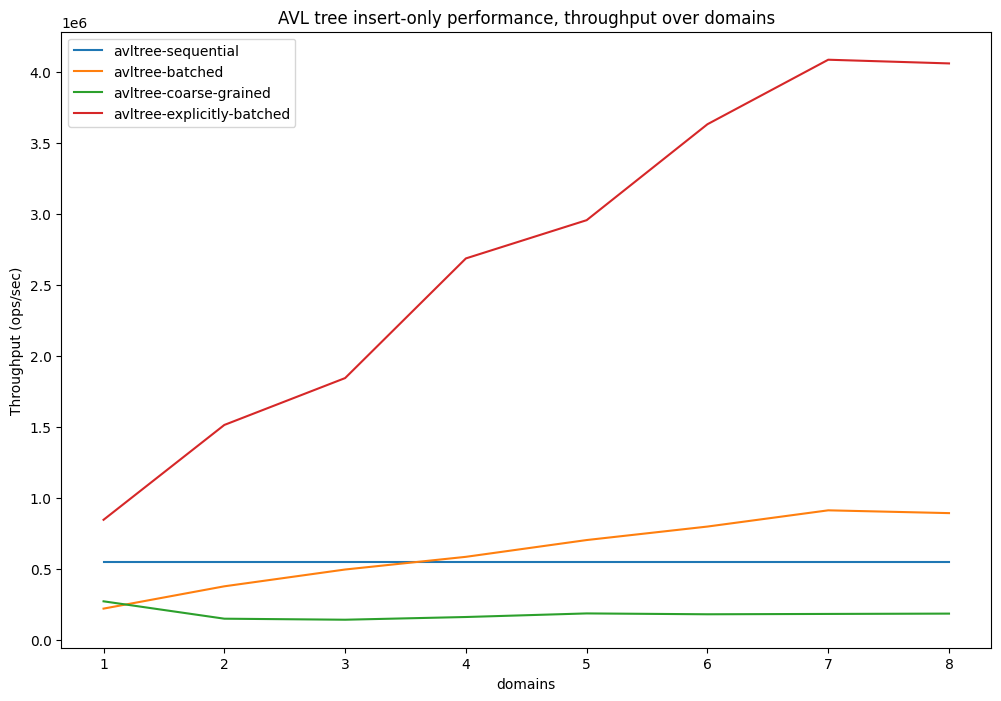

In [6]:
avl_insert_only_results = build_results(["avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
    }, sequential="avltree-sequential")

plot_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_insert_only_results, title="AVL tree insert-only performance, time over domains")
plot_throughput_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_insert_only_results, title="AVL tree insert-only performance, throughput over domains")

  0%|          | 0/8 [00:00<?, ?it/s]

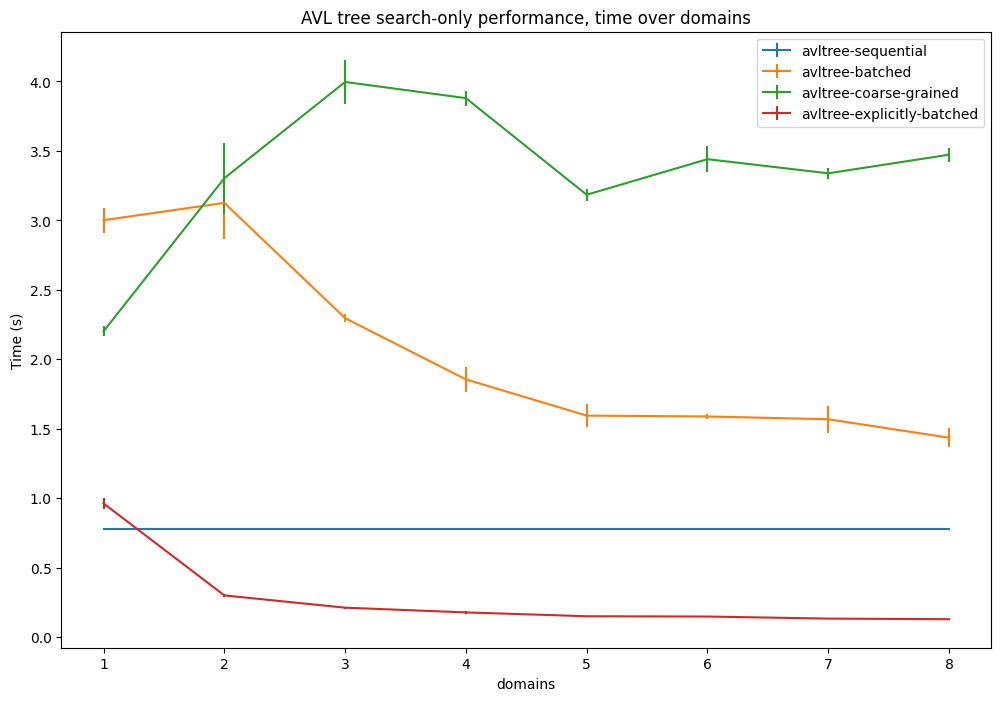

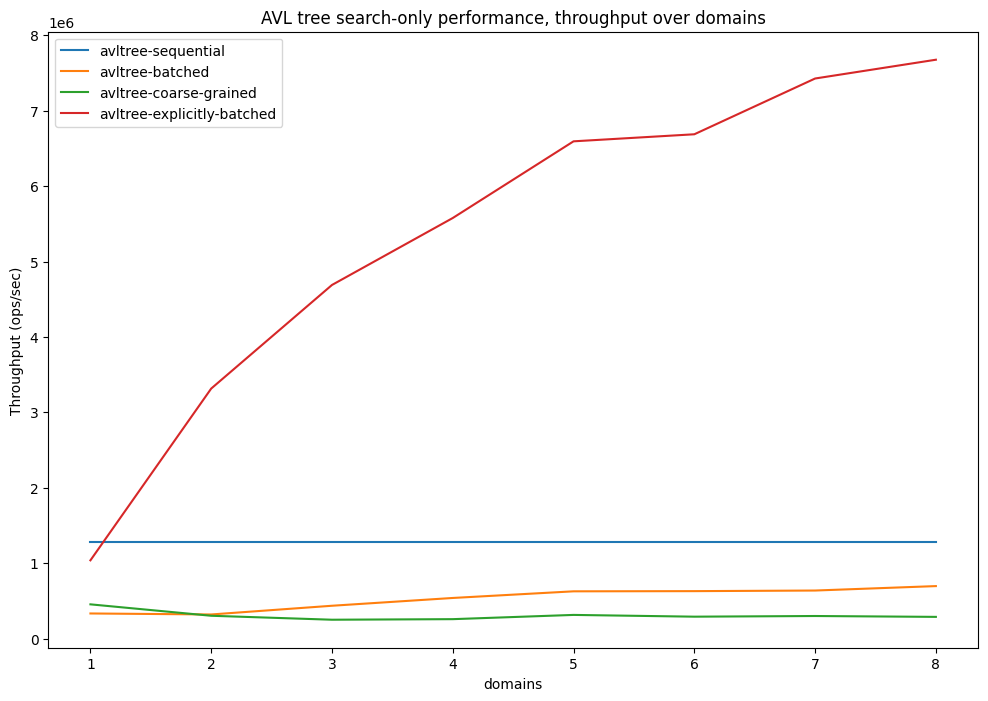

In [7]:
avl_search_only_results = build_results(["avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    }, sequential="avltree-sequential")

plot_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_search_only_results, title="AVL tree search-only performance, time over domains")
plot_throughput_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_search_only_results, title="AVL tree search-only performance, throughput over domains")

  0%|          | 0/8 [00:00<?, ?it/s]

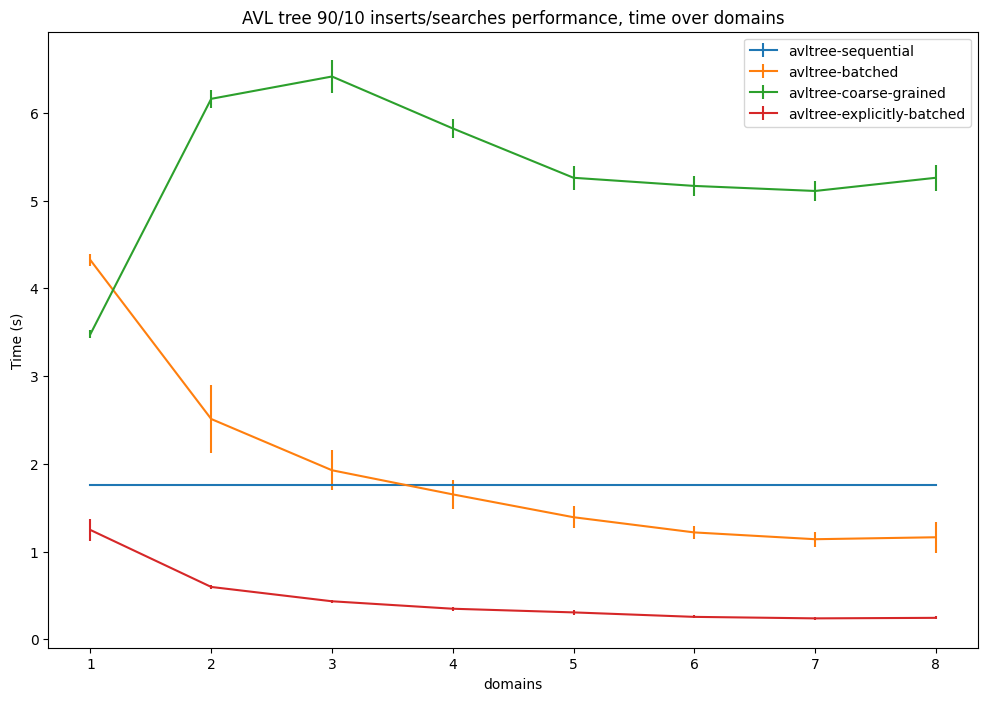

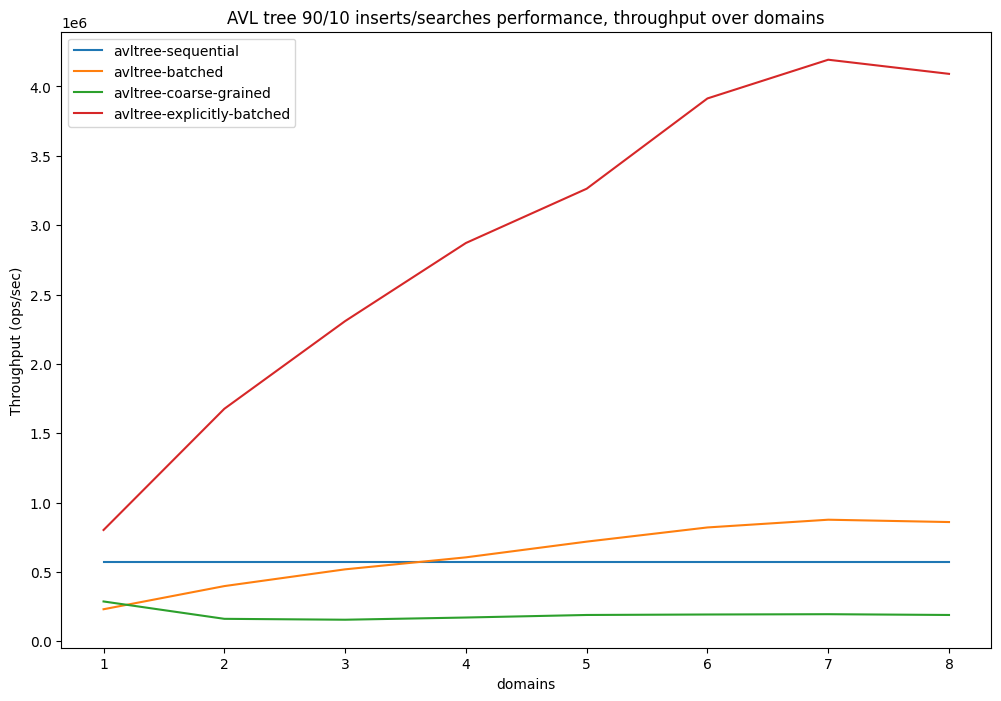

In [8]:
avl_90_10_results = build_results(["avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], {
    'count': 900_000,
    'init_count': 2_000_000,
    'no_searches': 100_000,
    'no_iters':5
    }, sequential="avltree-sequential")

plot_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_90_10_results, title="AVL tree 90/10 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_90_10_results, title="AVL tree 90/10 inserts/searches performance, throughput over domains")

In [36]:
avl_50_50_results = build_results(["avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], {
    'count': 500_000,
    'init_count': 2_000_000,
    'no_searches': 500_000,
    'no_iters':5
    }, sequential="avltree-sequential")

plot_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_50_50_results, title="AVL tree 50/50 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["avltree-sequential","avltree-batched", "avltree-coarse-grained", "avltree-explicitly-batched"], avl_50_50_results, title="AVL tree 50/50 inserts/searches performance, throughput over domains")

  0%|          | 0/8 [00:00<?, ?it/s]

### Red-Black Tree performance

In [ ]:
rb_insert_only_results = build_results(["rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
    }, sequential="rbtree-sequential")

plot_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_insert_only_results, title="Red-Black tree insert-only performance, time over domains")
plot_throughput_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_insert_only_results, title="Red-Black tree insert-only performance, throughput over domains")

In [ ]:
rb_search_only_results = build_results(["rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    }, sequential="rbtree-sequential")

plot_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_search_only_results, title="Red-Black Tree search-only performance, time over domains")
plot_throughput_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_search_only_results, title="Red-Black Tree search-only performance, throughput over domains")

In [ ]:
rb_90_10_results = build_results(["rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], {
    'count': 900_000,
    'init_count': 2_000_000,
    'no_searches': 100_000,
    'no_iters':5
    }, sequential="rbtree-sequential")

plot_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_90_10_results, title="Red-Black Tree 90/10 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_90_10_results, title="Red-Black Tree 90/10 inserts/searches performance, throughput over domains")

In [ ]:
rb_50_50_results = build_results(["rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], {
    'count': 500_000,
    'init_count': 2_000_000,
    'no_searches': 500_000,
    'no_iters':5
    }, sequential="rbtree-sequential")

plot_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_50_50_results, title= "Red-Black Tree 50/50 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["rbtree-sequential","rbtree-batched", "rbtree-coarse-grained", "rbtree-explicitly-batched"], rb_50_50_results, title= "Red-Black Tree 50/50 inserts/searches performance, throughput over domains")

### Treap performance

In [ ]:
treap_insert_only_results = build_results(["treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
    }, sequential="treap-sequential")

plot_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_insert_only_results, title="Treap insert-only performance, time over domains")
plot_throughput_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_insert_only_results, title="Treap insert-only performance, throughput over domains")

In [ ]:
treap_search_only_results = build_results(["treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    }, sequential="treap-sequential")

plot_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_search_only_results, title="Treap search-only performance, time over domains")
plot_throughput_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_search_only_results, title="Treap search-only performance, throughput over domains")

In [ ]:
treap_90_10_results = build_results(["treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], {
    'count': 900_000,
    'init_count': 2_000_000,
    'no_searches': 100_000,
    'no_iters':5
    }, sequential="treap-sequential")

plot_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_90_10_results, title="Treap 90/10 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_90_10_results, title="Treap 90/10 inserts/searches performance, throughput over domains")

In [ ]:
treap_50_50_results = build_results(["treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], {
    'count': 500_000,
    'init_count': 2_000_000,
    'no_searches': 500_000,
    'no_iters':5
    }, sequential="treap-sequential")

plot_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_50_50_results, title="Treap 50/50 inserts/searches performance, time over domains")
plot_throughput_results('domains', ["treap-sequential","treap-batched", "treap-coarse-grained", "treap-explicitly-batched"], treap_50_50_results, title="Treap 50/50 inserts/searches performance, throughput over domains")


# 
# 
# 
# 
# OLD STUFF

  0%|          | 0/8 [00:00<?, ?it/s]

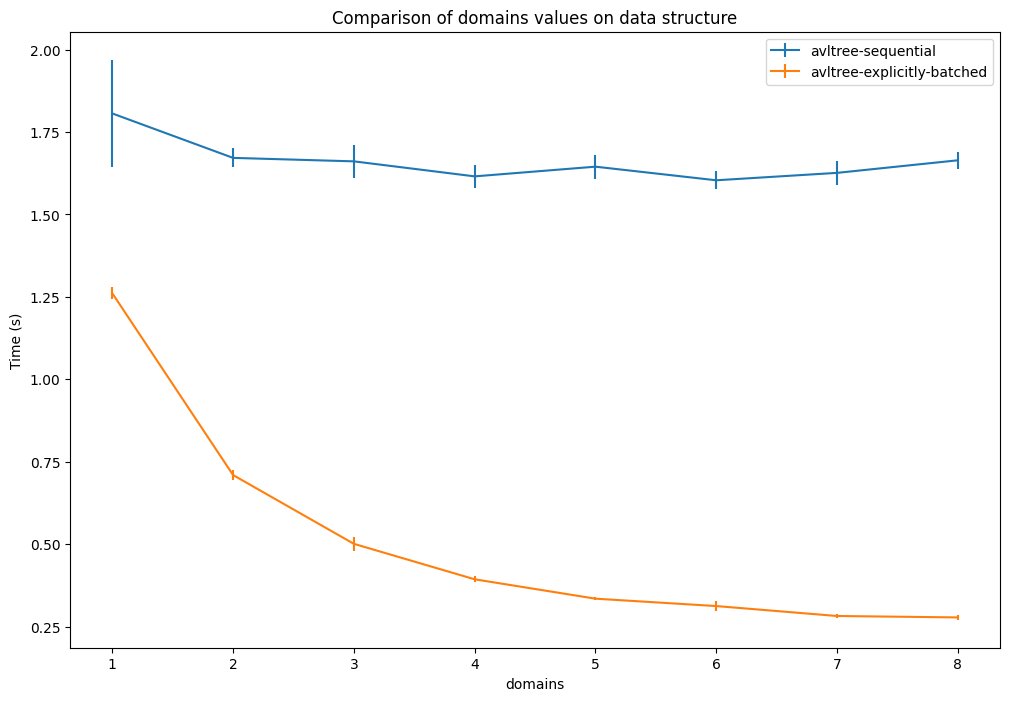

In [3]:
build_results = utils.build_results
plot_results = utils.plot_results

avl_insert_only_results = build_results(["avltree-sequential", "avltree-explicitly-batched"], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
    })

plot_results('domains', ["avltree-sequential", "avltree-explicitly-batched"], avl_insert_only_results)

  0%|          | 0/8 [00:00<?, ?it/s]

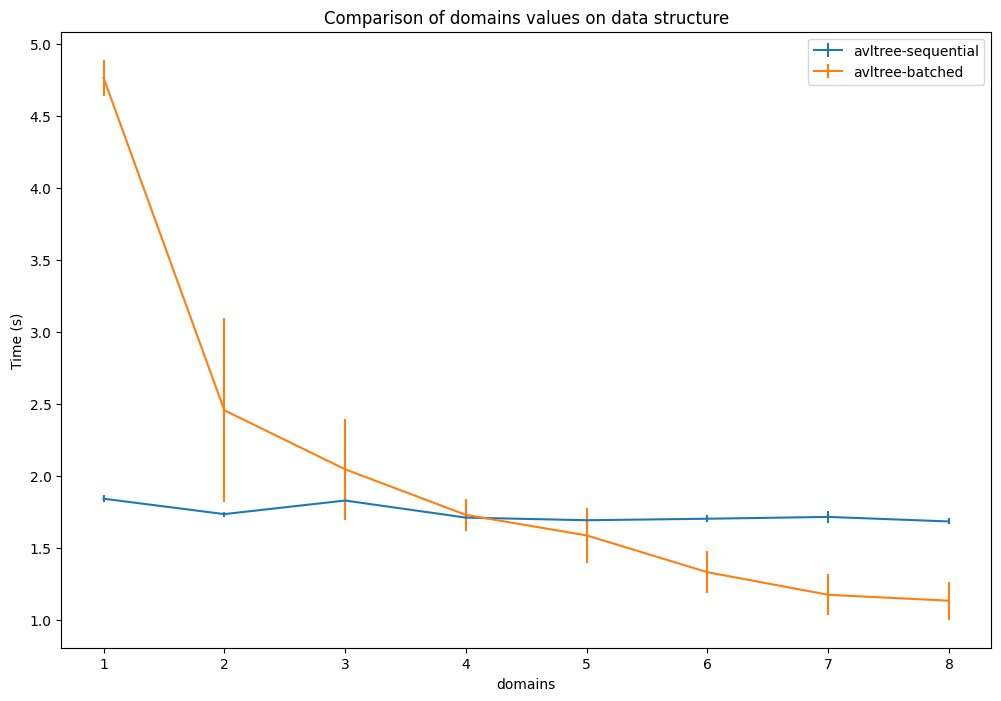

In [4]:
build_results = utils.build_results
plot_results = utils.plot_results

avl_insert_only_results = build_results(["avltree-sequential", "avltree-batched"], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
    })

plot_results('domains', ["avltree-sequential", "avltree-batched"], avl_insert_only_results)

  0%|          | 0/8 [00:00<?, ?it/s]

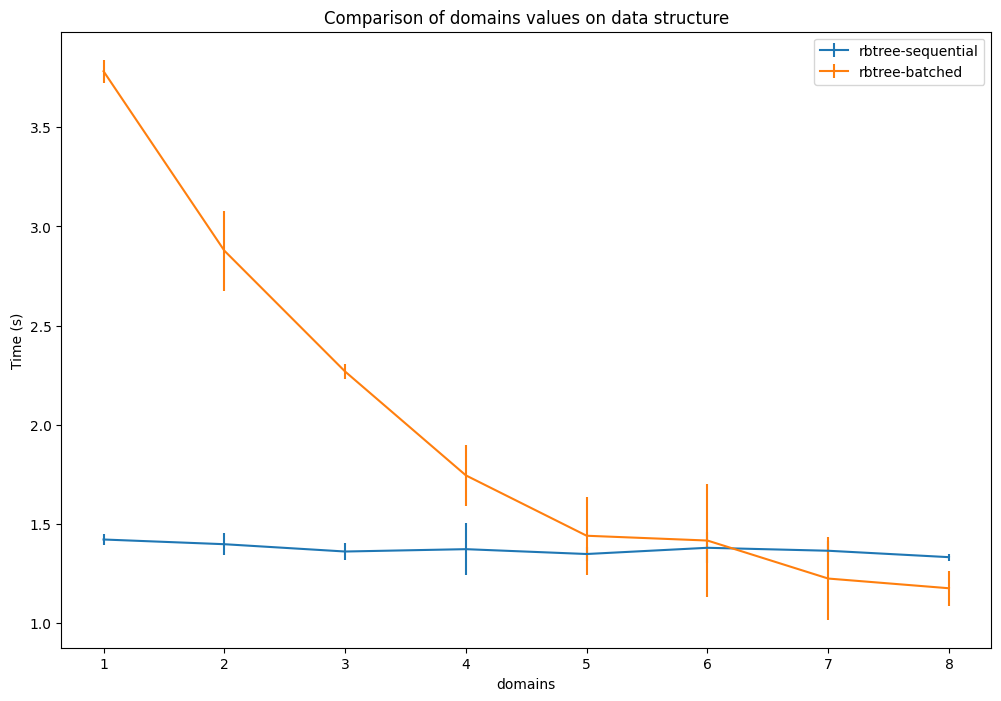

In [5]:
rb_insert_only_results = build_results(["rbtree-sequential", "rbtree-batched"], {
    'count': 1_000_000,
    'init_count': 2_000_000,
    'no_searches': 0,
    'no_iters':5
    })

plot_results('domains', ["rbtree-sequential", "rbtree-batched"], rb_insert_only_results)

  0%|          | 0/8 [00:00<?, ?it/s]

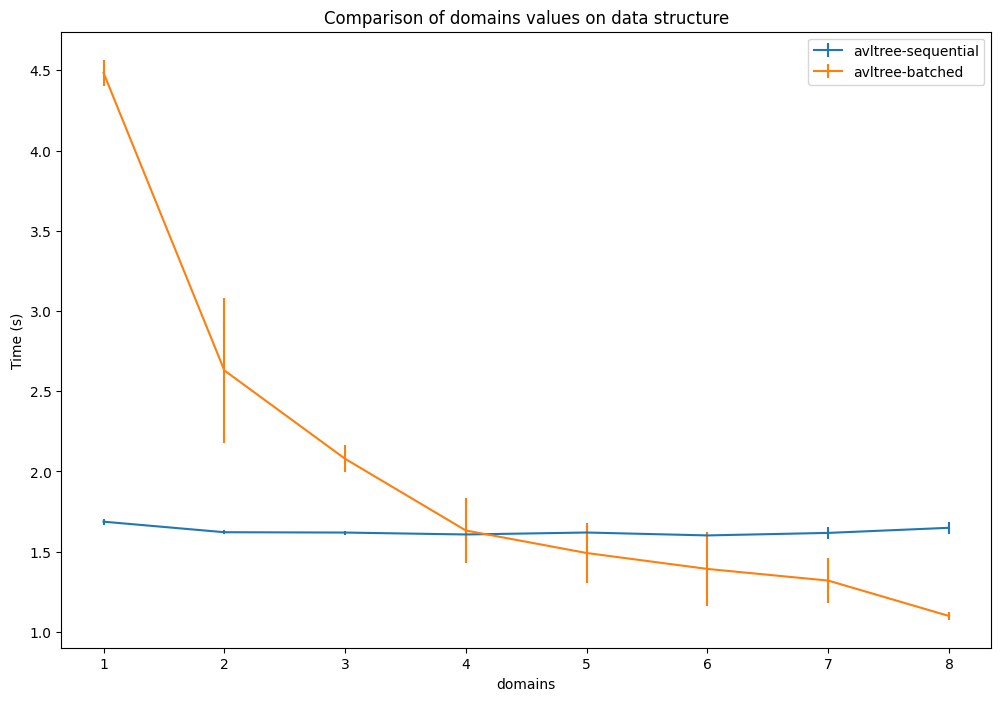

In [17]:
avl_90_10_results = build_results(["avltree-sequential", "avltree-batched"], {
    'count': 900_000,
    'init_count': 2_000_000,
    'no_searches': 100_000,
    'no_iters':5
    })

plot_results('domains', ["avltree-sequential", "avltree-batched"], avl_90_10_results)

  0%|          | 0/8 [00:00<?, ?it/s]

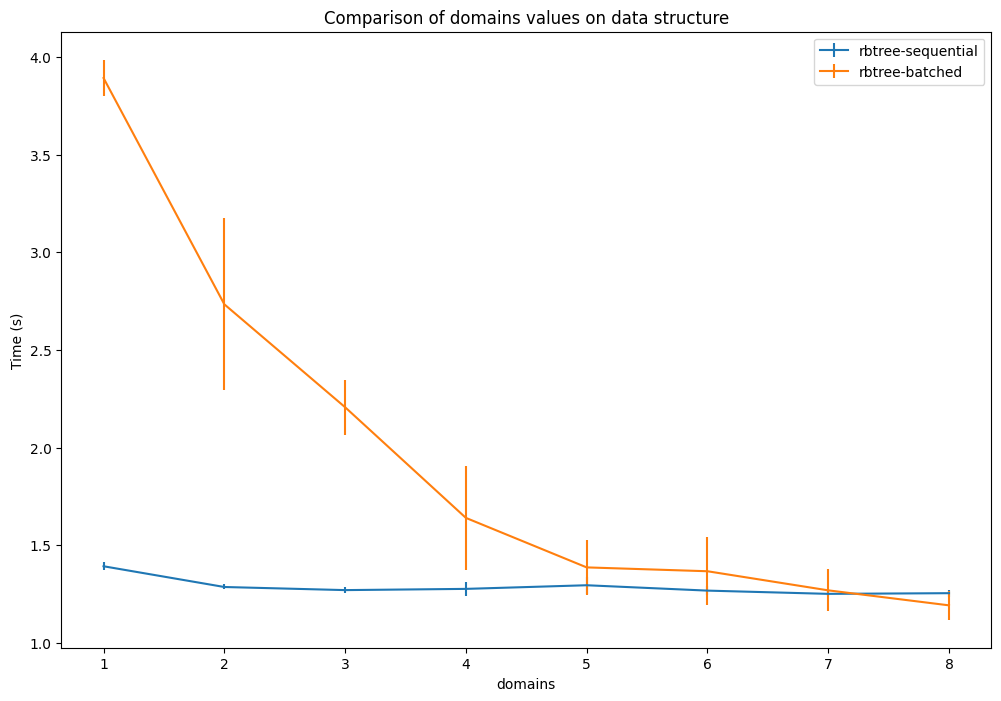

In [18]:
rb_90_10_results = build_results(["rbtree-sequential", "rbtree-batched"], {
    'count': 900_000,
    'init_count': 2_000_000,
    'no_searches': 100_000,
    'no_iters':5
    })

plot_results('domains', ["rbtree-sequential", "rbtree-batched"], rb_90_10_results)

  0%|          | 0/8 [00:00<?, ?it/s]

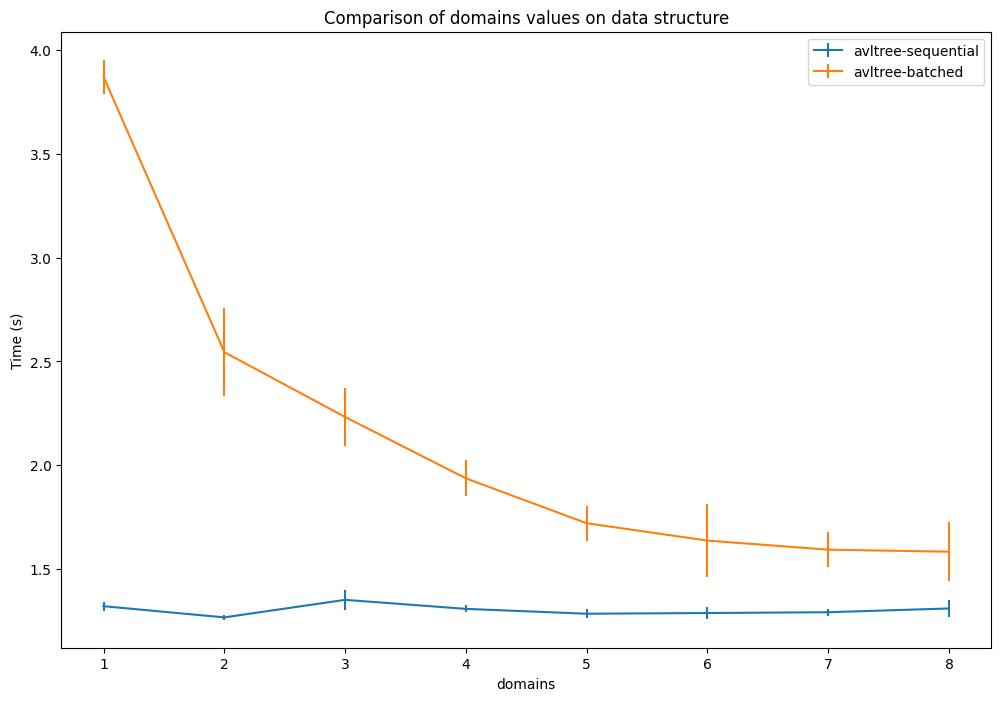

In [15]:
avl_50_50_results = build_results(["avltree-sequential", "avltree-batched"], {
    'count': 500_000,
    'init_count': 2_000_000,
    'no_searches': 500_000,
    'no_iters':5
    })

plot_results('domains', ["avltree-sequential", "avltree-batched"], avl_50_50_results)

  0%|          | 0/8 [00:00<?, ?it/s]

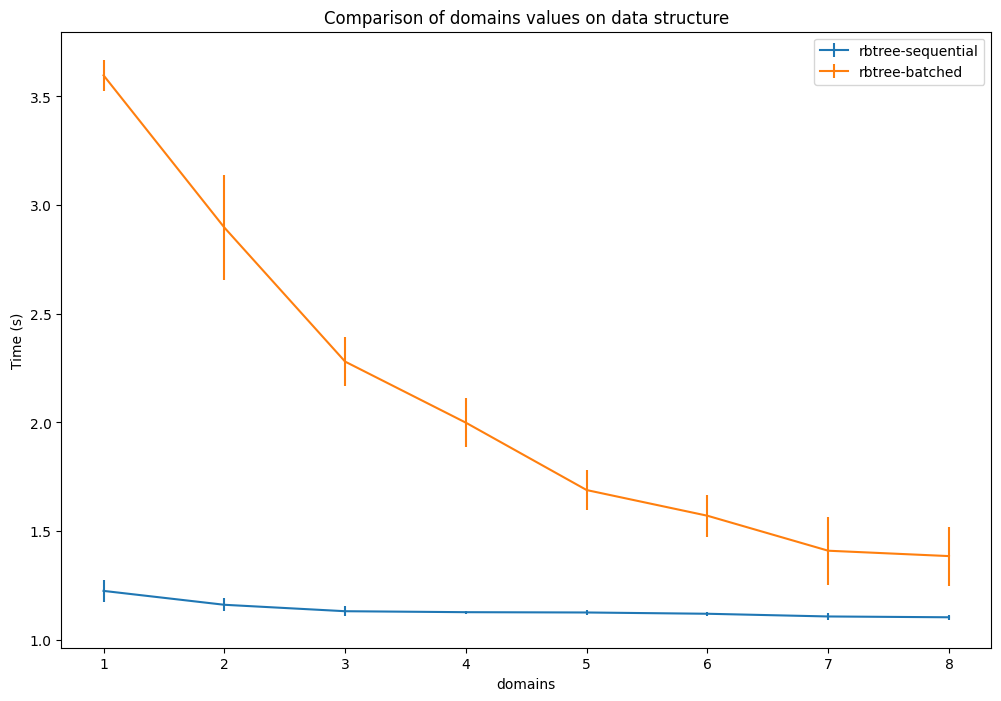

In [16]:
rb_50_50_results = build_results(["rbtree-sequential", "rbtree-batched"], {
    'count': 500_000,
    'init_count': 2_000_000,
    'no_searches': 500_000,
    'no_iters':5
    })

plot_results('domains', ["rbtree-sequential", "rbtree-batched"], rb_50_50_results)

  0%|          | 0/8 [00:00<?, ?it/s]

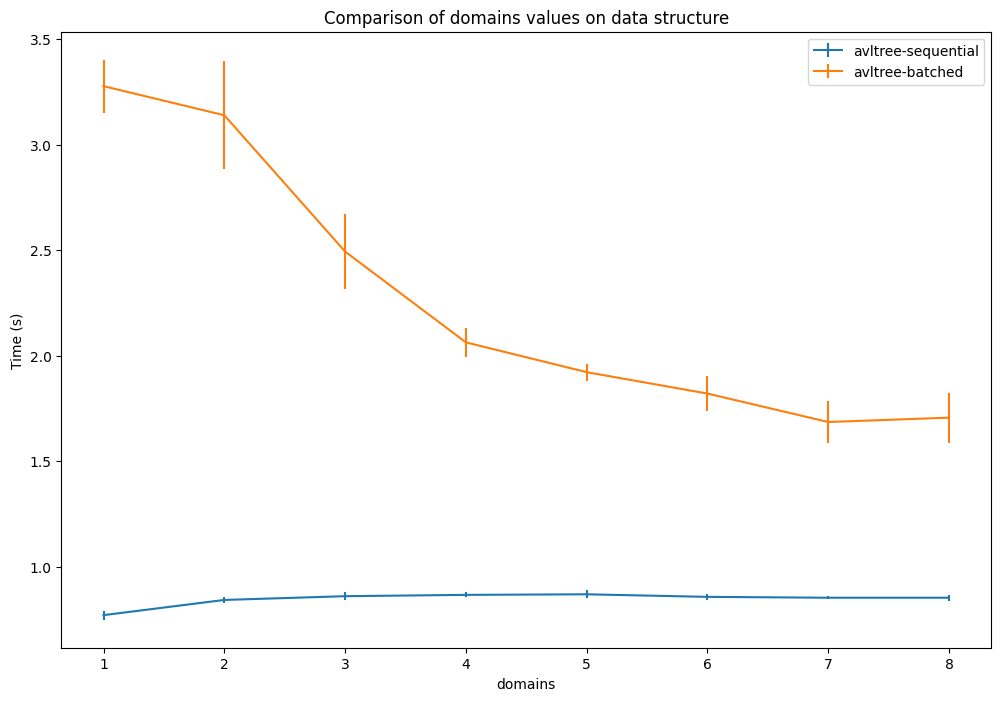

In [13]:
avl_search_only_results = build_results(["avltree-sequential", "avltree-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    })

plot_results('domains', ["avltree-sequential", "avltree-batched"], avl_search_only_results)

  0%|          | 0/8 [00:00<?, ?it/s]

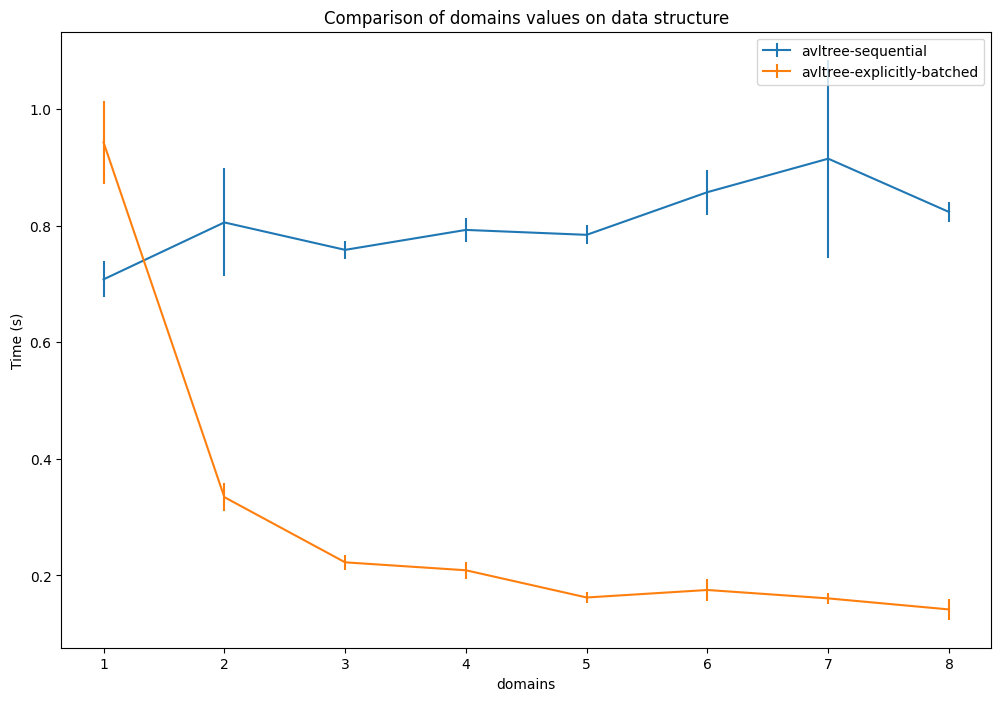

In [4]:
avl_search_only_results = build_results(["avltree-sequential", "avltree-explicitly-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    })

plot_results('domains', ["avltree-sequential", "avltree-explicitly-batched"], avl_search_only_results)

In [ ]:
avl_search_only_results = build_results_seq_opt(["avltree-explicitly-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    }, sequential="avltree-sequential")

plot_results('domains', ["avltree-sequential", "avltree-explicitly-batched"], avl_search_only_results)

  0%|          | 0/8 [00:00<?, ?it/s]

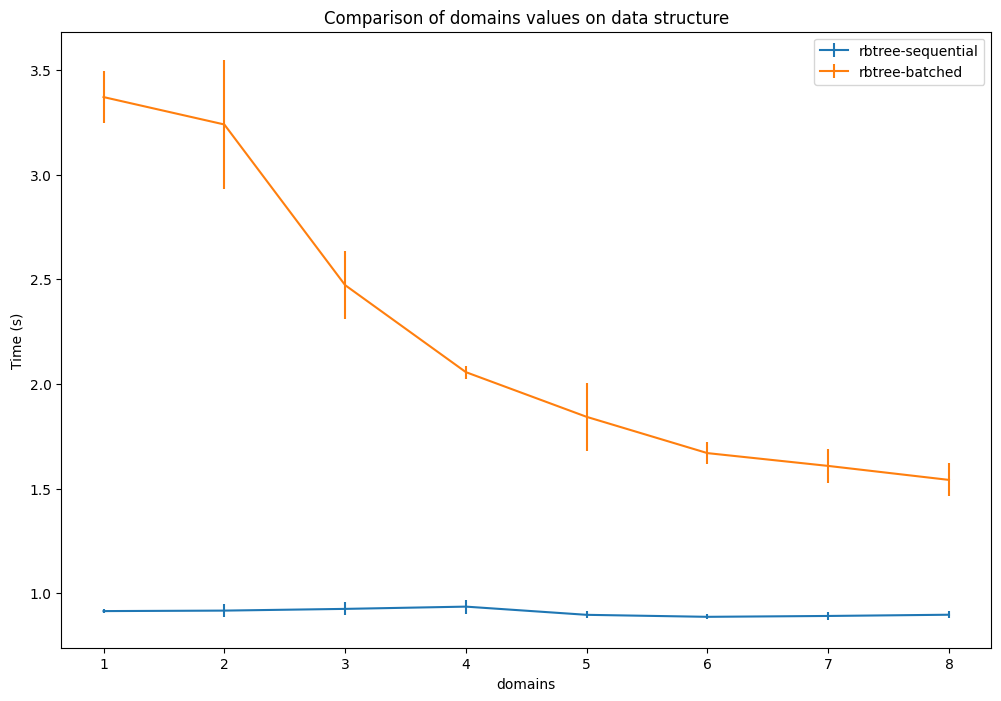

In [14]:
rb_search_only_results = build_results(["rbtree-sequential", "rbtree-batched"], {
    'count': 0,
    'init_count': 2_000_000,
    'no_searches': 1_000_000,
    'no_iters':5
    })

plot_throughput_results('domains', ["rbtree-sequential", "rbtree-batched"], rb_search_only_results)